# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as ata
from MCForecastTools import MCSimulation
import json

# %matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()

# view API resonse
# print(json.dumps(btc_response_data,indent=4))

# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()

# view API resonse
# print(json.dumps(eth_response_data,indent=4))

# Compute current value of my crpto
my_btc_value = my_btc * btc_response_data["data"]["1"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_response_data["data"]["1027"]["quotes"]["USD"]["price"]

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $57346.80
The current value of your 5.3 ETH is $20823.59


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
ata_api_obj = ata.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)

# verify alpaca trade api obj
# ata_api_obj

In [8]:
# Format current date as ISO format
current_date = pd.Timestamp('2021-11-07', tz='America/New_York').isoformat() 

# test date
# print(current_date)

# Set the tickers
tickers = ['AGG', 'SPY']

# test tickers
# print(tickers)

# Set timeframe to '1D' for Alpaca API
timeframe = '1D'

# test timeframe
# print(timeframe)

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio_1d = ata_api_obj.get_barset(
    tickers,
    timeframe,
    start = current_date, 
    # end = current_date, # <-- askbcs-learning asstant: suggestion to remove, commented to keep record of this solution, avoid header only pd.DataFrame
    limit = 1 # <-- set to 1 so that 1 day is returned
).df.round(decimals=2)


df_portfolio = ata_api_obj.get_barset(
    tickers,
    timeframe,
    start = current_date, 
    # end = current_date, # <-- askbcs-learning assistant: suggestion to remove, commented to keep record of this solution, avoid header only pd.DataFrame
    limit = 1000 # <-- set to 1000 and reserved df_portfolio incase this notebook requires the 1000 day data  
).df.round(decimals=2)

# Preview DataFrame
print(df_portfolio_1d.info())
print()
print(df_portfolio.info())
print()
display(df_portfolio_1d)
print()
display(df_portfolio)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1 entries, 2021-12-10 00:00:00-05:00 to 2021-12-10 00:00:00-05:00
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (AGG, open)    1 non-null      float64
 1   (AGG, high)    1 non-null      float64
 2   (AGG, low)     1 non-null      float64
 3   (AGG, close)   1 non-null      float64
 4   (AGG, volume)  1 non-null      int64  
 5   (SPY, open)    1 non-null      float64
 6   (SPY, high)    1 non-null      float64
 7   (SPY, low)     1 non-null      float64
 8   (SPY, close)   1 non-null      float64
 9   (SPY, volume)  1 non-null      int64  
dtypes: float64(8), int64(2)
memory usage: 88.0 bytes
None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2021-11-08 00:00:00-05:00 to 2021-12-10 00:00:00-05:00
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (AGG, open)   

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-12-10 00:00:00-05:00  114.37  114.51  114.22  114.24  6263328  469.23   

                                                            
                            high     low   close    volume  
time                                                        
2021-12-10 00:00:00-05:00  470.9  466.51  470.72  64958435

AGG                                       SPY  \
                             open    high     low   close    volume    open   
time                                                                          
2021-11-08 00:00:00-05:00  115.14  115.15  114.95  115.01   4696293  469.70   
2021-11-09 00:00:00-05:00  115.38  115.50  115.29  115.33   6955738  469.32   
2021-11-10 00:00:00-05:00  115.11  115.14  114.40  114.51   8821475  465.58   
2021-11-11 00:00:00-05:00  114.51  114.57  114.30  114.34   3105027  465.21   
2021-11-12 00:00:00-05:00  114.50  114.58  114.26  114.33   4398727  465.12   
2021-11-15 00:00:00-05:00  114.30  114.31  113.91  113.93   6219329  468.64   
2021-11-16 00:00:00-05:00  113.92  114.11  113.84  113.87   5317284  467.16   
2021-11-17 00:00:00-05:00  113.79  114.13  113.77  114.13   5513227  469.00   
2021-11-18 00:00:00-05:00  114.05  114.28  114.03  114.23   4115721  469.24   
2021-11-19 00:00:00-05:00  114.49  114.59  114.42  114.45   4843203  469.61   
2021-11-22 00:00:00-05:00  114.14  114.23  113.82  113.88   6216218  470.81   
2021-11-23 00:00:00-05:00  113.71  113.77  113.45  113.45   5835080  467.22   
2021-11-24 00:00:00-05:00  113.47  113.72  113.39  113.72   5959367  466.06   
2021-11-26 00:00:00-05:00  114.28  114.58  114.20  114.54   2886169  462.38   
2021-11-29 00:00:00-05:00  114.15  114.60  114.13  114.55   7604952  464.07   
2021-11-30 00:00:00-05:00  114.87  115.11  114.50  114.76  10559678  462.00   
2021-12-01 00:00:00-05:00  114.27  114.64  114.21  114.61  11306707  461.64   
2021-12-02 00:00:00-05:00  114.67  114.79  114.40  114.61   7507924  450.72   
2021-12-03 00:00:00-05:00  114.50  115.24  114.46  115.06   7279561  459.17   
2021-12-06 00:00:00-05:00  114.98  115.04  114.62  114.66   6364620  456.14   
2021-12-07 00:00:00-05:00  114.52  114.71  114.45  114.48   5783341  464.41   
2021-12-08 00:00:00-05:00  114.37  114.37  114.05  114.17   7416826  468.70   
2021-12-09 00:00:00-05:00  114.28  114.39  114.12  114.20   8223995  468.15   
2021-12-10 00:00:00-05:00  114.37  114.51  114.22  114.24   6263328  469.23   

                                                              
                             high     low   close     volume  
time                                                          
2021-11-08 00:00:00-05:00  470.23  468.20  468.97   38945705  
2021-11-09 00:00:00-05:00  469.57  465.88  467.38   47198095  
2021-11-10 00:00:00-05:00  467.38  462.04  463.63   63500032  
2021-11-11 00:00:00-05:00  465.29  463.75  463.81   31757893  
2021-11-12 00:00:00-05:00  467.86  464.11  467.26   44677612  
2021-11-15 00:00:00-05:00  468.81  466.23  467.39   39813913  
2021-11-16 00:00:00-05:00  470.48  467.07  469.24   41723421  
2021-11-17 00:00:00-05:00  469.19  467.48  468.11   40088372  
2021-11-18 00:00:00-05:00  470.01  466.34  469.71   45100029  
2021-11-19 00:00:00-05:00  470.94  468.50  468.91   49009452  
2021-11-22 00:00:00-05:00  473.54  467.35  467.53   61497941  
2021-11-23 00:00:00-05:00  469.10  464.45  468.25   62851184  
2021-11-24 00:00:00-05:00  469.57  465.19  469.37   54274217  
2021-11-26 00:00:00-05:00  463.90  457.77  459.03   93783057  
2021-11-29 00:00:00-05:00  466.56  461.73  464.63   68239627  
2021-11-30 00:00:00-05:00  464.03  455.30  455.78  126381409  
2021-12-01 00:00:00-05:00  464.67  450.29  450.53  112177764  
2021-12-02 00:00:00-05:00  459.07  450.31  457.38  109873511  
2021-12-03 00:00:00-05:00  460.30  448.92  453.43  124795750  
2021-12-06 00:00:00-05:00  460.79  453.56  458.78   88930961  
2021-12-07 00:00:00-05:00  468.88  458.65  468.24   79124909  
2021-12-08 00:00:00-05:00  470.00  466.83  469.54   62917411  
2021-12-09 00:00:00-05:00  469.63  466.14  466.34   54963509  
2021-12-10 00:00:00-05:00  470.90  466.51  470.72   64958435

In [9]:
# Pick AGG and SPY close prices
# agg_close_price = float(df_portfolio["AGG"]["close"])
# spy_close_price = float(df_portfolio["SPY"]["close"])

agg_close_price = float(df_portfolio_1d["AGG"]["close"])
spy_close_price = float(df_portfolio_1d["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.24
Current SPY closing price: $470.72


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23536.00
The current value of your 200 AGG shares is $22848.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_assets = my_btc_value + my_eth_value
stock_assets = my_spy_value + my_agg_value

# check vars
# print(crypto_assets)
# print(stock_assets)

# Create savings DataFrame
df_savings_value = [crypto_assets, stock_assets]
df_savings = pd.DataFrame(df_savings_value, index = ["Crypto", "Shares"], columns=["Value"])

# Display savings DataFrame
display(df_savings)

,Value
Crypto,78170.394
Shares,46384.000


<AxesSubplot:title={'center':'Savings Health Analysis'}, ylabel='Value'>

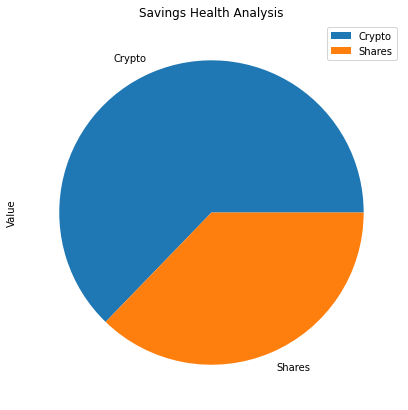

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="Value", title= "Savings Health Analysis", figsize = (7, 7))

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['Value'].sum()

# verify pd.df.sum()
# total_savings

# Validate saving health
if total_savings > emergency_fund:
    print("Your Total Savings are greater than your Emergency Funds, congratulations.")
elif total_savings == emergency_fund:
    print("Your Total Savings matches your Emergency Funds, you met your financial goal.")
else:
    print(f"${(emergency_fund - total_savings)} to reach your finanacal target.")

Your Total Savings are greater than your Emergency Funds, congratulations.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

# 5 years' worth of historical data for SPY and AGG
df_stock_data = ata_api_obj.get_barset(
    tickers,
    timeframe,
    start = start_date, 
    end = end_date,
    limit = 1000
).df.round(decimals=2)

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open    high     low   close     volume    open   
time                                                                           
2017-05-10 00:00:00-04:00  108.60  108.66  108.44  108.52  1427511.0     NaN   
2017-05-11 00:00:00-04:00  108.35  108.54  108.34  108.52  1773499.0  239.35   
2017-05-12 00:00:00-04:00  108.81  108.94  108.78  108.92  1136553.0  239.09   
2017-05-15 00:00:00-04:00  108.85  108.94  108.82  108.89  1620264.0  239.47   
2017-05-16 00:00:00-04:00  108.88  109.10  108.88  109.00  1394153.0  240.62   

                                                               
                             high     low   close      volume  
time                                                           
2017-05-10 00:00:00-04:00     NaN     NaN     NaN         NaN  
2017-05-11 00:00:00-04:00  239.57  238.13  239.41  45435690.0  
2017-05-12 00:00:00-04:00  239.21  238.67  239.03  35283567.0  
2017-05-15 00:00:00-04:00  240.44  239.45  240.24  42230620.0  
2017-05-16 00:00:00-04:00  240.67  239.63  240.10  37206183.0

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

# Monte Carlo simulation
mcs_30a_cum_returns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
mcs_30a_cum_returns.portfolio_data.head(30)

AGG                                     \
                             open    high     low   close     volume   
time                                                                   
2017-05-10 00:00:00-04:00  108.60  108.66  108.44  108.52  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.54  108.34  108.52  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.94  108.78  108.92  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.94  108.82  108.89  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.10  108.88  109.00  1394153.0   
2017-05-17 00:00:00-04:00  109.35  109.60  109.28  109.56  2263851.0   
2017-05-18 00:00:00-04:00  109.54  109.63  109.44  109.55  1873534.0   
2017-05-19 00:00:00-04:00  109.51  109.54  109.35  109.52  1345002.0   
2017-05-22 00:00:00-04:00  109.43  109.48  109.40  109.44  1199164.0   
2017-05-23 00:00:00-04:00  109.50  109.53  109.21  109.24  1194872.0   
2017-05-24 00:00:00-04:00  109.25  109.50  109.21  109.45  2325960.0   
2017-05-25 00:00:00-04:00  109.45  109.49  109.37  109.46  1382257.0   
2017-05-26 00:00:00-04:00  109.46  109.54  109.44  109.48   853245.0   
2017-05-30 00:00:00-04:00  109.58  109.66  109.54  109.64  1199625.0   
2017-05-31 00:00:00-04:00  109.64  109.81  109.64  109.75  2011554.0   
2017-06-01 00:00:00-04:00  109.36  109.50  109.34  109.47  2241270.0   
2017-06-02 00:00:00-04:00  109.74  109.89  109.70  109.84  1322101.0   
2017-06-05 00:00:00-04:00  109.66  109.74  109.60  109.66  2074161.0   
2017-06-06 00:00:00-04:00  109.87  109.95  109.81  109.87  1434088.0   
2017-06-07 00:00:00-04:00  109.81  109.87  109.70  109.73  1570692.0   
2017-06-08 00:00:00-04:00  109.70  109.70  109.51  109.65  1243191.0   
2017-06-09 00:00:00-04:00  109.51  109.63  109.46  109.56  1356020.0   
2017-06-12 00:00:00-04:00  109.51  109.70  109.47  109.56  1184601.0   
2017-06-13 00:00:00-04:00  109.43  109.60  109.43  109.58  1324388.0   
2017-06-14 00:00:00-04:00  110.00  110.18  109.85  109.95  2304819.0   
2017-06-15 00:00:00-04:00  109.90  109.90  109.78  109.87  1938779.0   
2017-06-16 00:00:00-04:00  109.86  109.97  109.85  109.94  1709677.0   
2017-06-19 00:00:00-04:00  109.87  109.90  109.74  109.79  1375531.0   
2017-06-20 00:00:00-04:00  109.85  110.03  109.80  109.98  2010628.0   
2017-06-21 00:00:00-04:00  109.88  110.04  109.88  109.98  1085301.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-05-11 00:00:00-04:00     0.000000  239.35  239.57  238.13  239.41   
2017-05-12 00:00:00-04:00     0.003686  239.09  239.21  238.67  239.03   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.24   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.10   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.85   
2017-05-18 00:00:00-04:00    -0.000091  235.70  237.75  235.43  236.67   
2017-05-19 00:00:00-04:00    -0.000274  237.33  239.08  237.27  238.30   
2017-05-22 00:00:00-04:00    -0.000730  238.90  239.71  238.82  239.53   
2017-05-23 00:00:00-04:00    -0.001827  239.95  240.24  239.51  240.02   
2017-05-24 00:00:00-04:00     0.001922  240.32  240.73  239.93  240.59   
2017-05-25 00:00:00-04:00     0.000091  241.20  242.08  240.96  241.71   
2017-05-26 00:00:00-04:00     0.000183  241.55  241.90  241.45  241.74   
2017-05-30 00:00:00-04:00     0.001461  241.33  241.79  241.16  241.52   
2017-05-31 00:00:00-04:00     0.001003  241.84  241.88  240.64  241.42   
2017-06-01 00:00:00-04:00    -0.002551  241.96  243.34  241.64  243.32   
2017-06-02 00:00:00-04:00     0.003380  243.41  244.35  243.08  244.13   
2017-06-05 00:00:00-04:00    -0.001639  243.98  244.30  243.76  243.96   
2017-06-06 00:00:00-04:00     0.001915  243.31  243.98  243.12  243.25   
2017-06-07 00:00:00-04:00

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

#note: running this MCForecastTools function causes the PerformanceWarning, refered: https://github.com/twopirllc/pandas-ta/issues/340

mcs_30a_cum_returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/mbl/src/fintech/Assignments-local-UTOR-VIRT-FIN-PT-11-2021-U-C/unit-5-financial-planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993189,1.007306,1.008036,1.006368,0.982776,1.018240,0.995277,1.010915,1.003045,0.999983,...,0.998686,1.000203,1.004180,1.000894,0.996375,0.984686,1.005339,1.002779,0.993579,0.989503
2,0.992790,1.006537,1.022166,0.997519,0.993481,1.007986,0.996399,1.012500,1.007163,0.987736,...,1.003065,1.002820,1.007878,1.015553,0.991381,0.981515,1.018583,0.992592,0.992101,0.989527
3,0.993085,1.012121,1.031324,0.986960,0.978376,1.006787,1.000953,1.017743,1.008497,0.998869,...,1.004655,0.995450,1.007888,1.024447,0.993032,0.969556,1.032204,0.989649,0.981688,0.989912
4,0.989423,0.998691,1.021710,0.979903,0.981566,0.995056,0.994103,1.002386,1.014111,0.999545,...,1.007662,1.008056,1.004340,1.032140,0.990619,0.975199,1.028737,0.994788,0.969553,0.997135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,22.562957,24.469848,17.986338,12.658065,10.868936,15.829956,2.969105,22.537077,10.336543,4.768339,...,8.614560,53.024005,10.714752,8.673992,16.120234,9.676853,71.211501,12.547008,6.698367,21.896089
7557,22.611433,24.688125,17.751085,12.594223,10.708716,15.901672,2.974731,22.551040,10.328265,4.819415,...,8.712341,52.548588,10.744894,8.741168,16.327444,9.649873,71.137936,12.485987,6.702741,21.535502
7558,22.904380,24.965418,17.717871,12.664263,10.560953,15.860952,2.967131,22.427230,10.423303,4.857215,...,8.755127,52.261396,10.829220,8.802328,16.358848,9.683509,71.406911,12.523423,6.666778,21.482071
7559,23.038332,24.917450,17.817264,12.775537,10.520539,15.864009,2.960474,22.386002,10.544003,4.819507,...,8.798495,52.612282,10.816282,8.823183,16.239507,9.611206,71.568622,12.641939,6.704995,21.297593


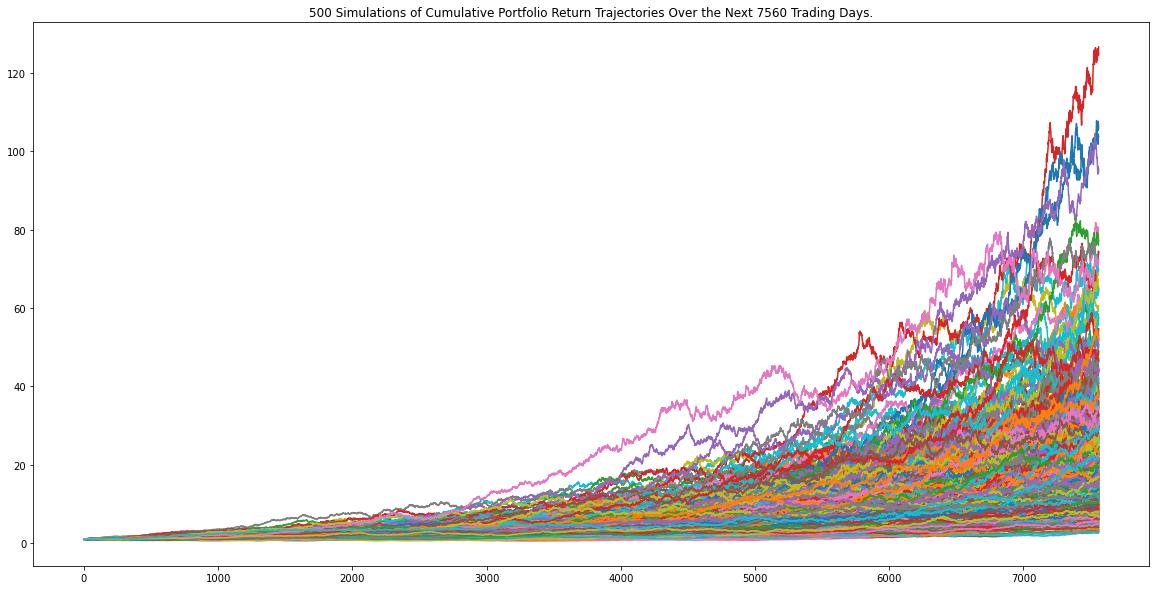

In [19]:
# Plot simulation outcomes
mcs_30a_line_plot = mcs_30a_cum_returns.plot_simulation()

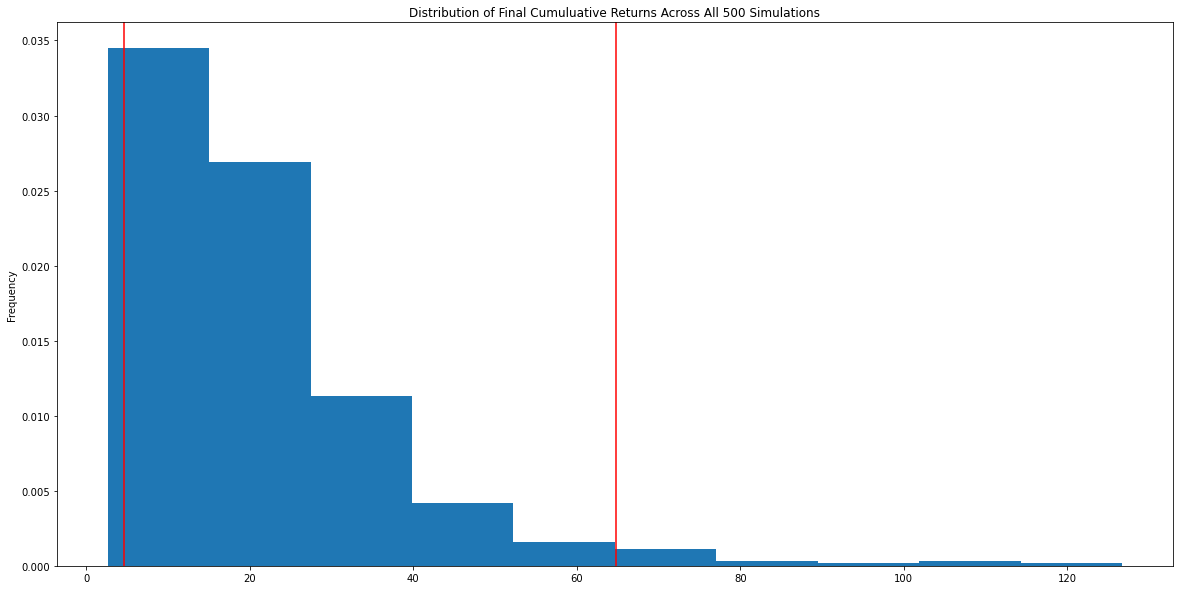

In [20]:
# Plot probability distribution and confidence intervals
mcs_30a_pdci = mcs_30a_cum_returns.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
mcs_30a_summary = mcs_30a_cum_returns.summarize_cumulative_return()

# Print summary statistics
print(mcs_30a_summary)

count           500.000000
mean             21.270793
std              15.929824
min               2.624089
25%              10.517175
50%              17.238826
75%              26.998217
max             126.704789
95% CI Lower      4.559818
95% CI Upper     64.788460
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(mcs_30a_summary[8]*initial_investment,2)
ci_upper = round(mcs_30a_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $91196.36 and $1295769.21


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(mcs_30a_summary[8]*initial_investment,2)
ci_upper = round(mcs_30a_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $136794.54 and $1943653.81


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mcs_5a_cum_returns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mcs_5a_cum_returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/mbl/src/fintech/Assignments-local-UTOR-VIRT-FIN-PT-11-2021-U-C/unit-5-financial-planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010228,0.987405,0.994561,0.977601,0.998769,0.996072,0.994511,0.995099,1.018739,1.001186,...,0.992351,1.001981,1.011736,1.017907,0.997560,0.998044,1.007136,1.000648,0.994784,1.011471
2,1.027547,0.988319,0.993112,0.972977,0.998302,1.004643,0.998079,0.995932,1.014413,1.001791,...,0.993315,1.004348,1.006388,1.026305,1.000230,1.009990,1.007957,1.008435,0.993239,1.011097
3,1.038944,0.998982,1.001284,0.972094,0.992810,1.005291,0.999827,0.998092,1.004446,1.005063,...,0.987651,1.008754,1.003215,1.027742,0.994254,1.015869,1.001653,1.000177,0.988995,1.016596
4,1.033777,0.996151,1.003131,0.969704,0.990964,1.003507,0.995216,1.009766,0.998156,1.002407,...,0.975451,1.010193,0.999331,1.013992,0.994573,1.022726,0.990123,0.996900,0.984029,1.031368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.285290,1.073926,1.331977,1.440152,1.548981,1.285731,1.490000,1.305828,1.583015,1.425202,...,1.554069,1.512737,2.088485,1.554133,1.591015,1.990899,1.363766,1.674771,1.704480,2.368939
1257,1.291682,1.057994,1.334596,1.435192,1.545593,1.298343,1.481052,1.301519,1.573733,1.424142,...,1.556775,1.511133,2.115584,1.566846,1.612987,2.004537,1.364455,1.655467,1.693395,2.390780
1258,1.293962,1.055252,1.336140,1.443224,1.523740,1.299253,1.501127,1.301435,1.560466,1.434478,...,1.553025,1.490400,2.114962,1.579237,1.620238,2.015564,1.360716,1.646461,1.724181,2.396643
1259,1.304876,1.078308,1.327063,1.443717,1.509507,1.280171,1.506763,1.342193,1.552296,1.414213,...,1.548050,1.514808,2.110454,1.588902,1.615666,2.032601,1.340158,1.645465,1.708221,2.441379


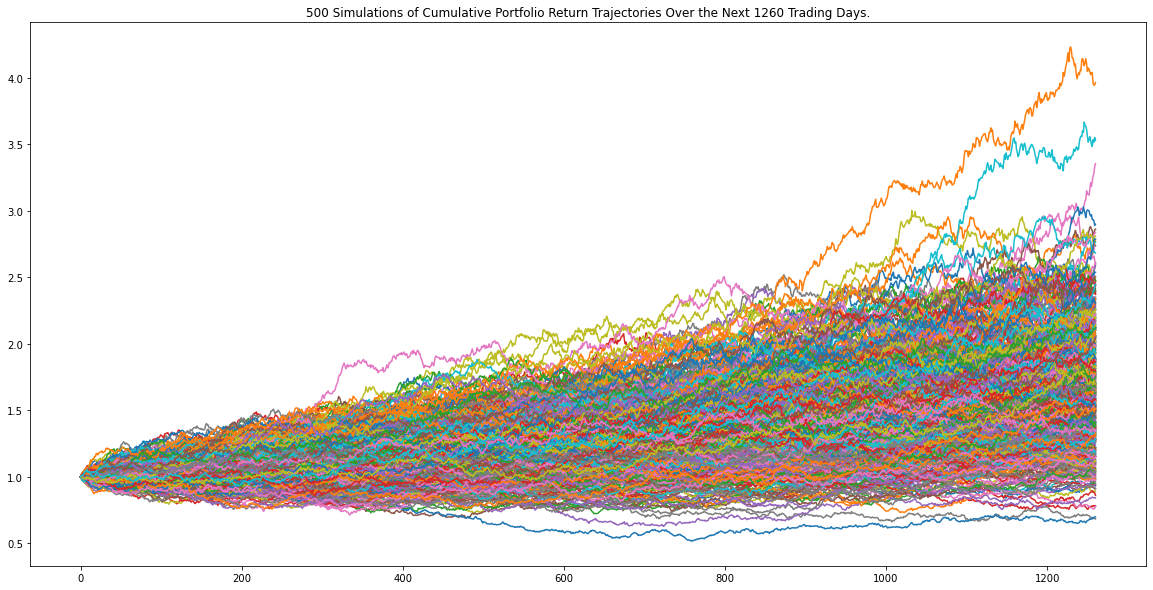

In [28]:
# Plot simulation outcomes
mcs_5a_cum_plot = mcs_5a_cum_returns.plot_simulation()

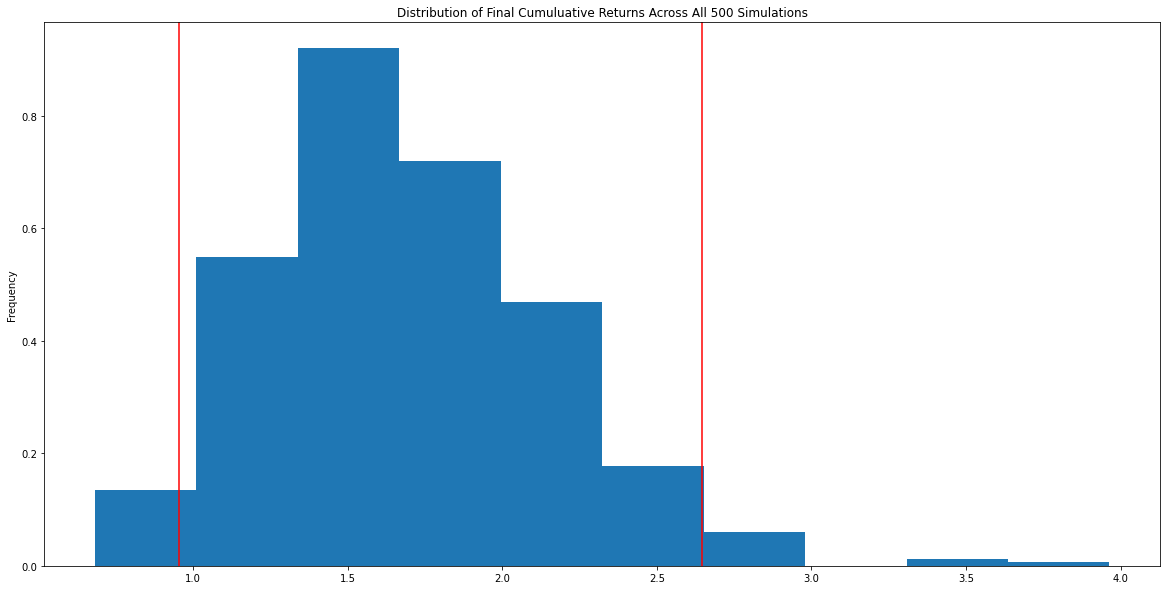

In [29]:
# Plot probability distribution and confidence intervals
mcs_5a_pdci = mcs_5a_cum_returns.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
mcs_5a_summary = mcs_5a_cum_returns.summarize_cumulative_return()

# Print summary statistics
print(mcs_5a_summary)

count           500.000000
mean              1.686622
std               0.450635
min               0.682895
25%               1.367038
50%               1.640977
75%               1.974207
max               3.963992
95% CI Lower      0.956303
95% CI Upper      2.647436
Name: 1260, dtype: float64


In [31]:
# Set initial investment
initial_investment_5a = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(mcs_5a_summary[8]*initial_investment_5a,2)
ci_upper_five = round(mcs_5a_summary[9]*initial_investment_5a,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5a} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $19126.06 and $52948.72


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mcs_10a_cum_returns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mcs_10a_cum_returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/mbl/src/fintech/Assignments-local-UTOR-VIRT-FIN-PT-11-2021-U-C/unit-5-financial-planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002365,0.989850,0.994893,0.997797,0.996220,1.007464,1.012873,0.989147,1.016973,0.993934,...,0.994902,0.996738,0.986178,0.989610,1.007445,1.000027,1.001129,1.007746,0.992265,0.990732
2,0.998799,0.977405,1.003885,1.007104,1.007430,1.009943,1.006270,0.986671,1.016696,1.004130,...,0.995925,0.995547,0.969145,0.983156,1.012603,1.013420,1.005465,1.013426,0.989856,1.001755
3,0.991058,0.984504,0.987568,1.015831,1.009609,1.003690,0.999401,0.975817,1.026511,1.006013,...,0.991828,1.002442,0.975838,0.995364,1.017963,1.027081,1.013744,1.009685,0.993462,1.010437
4,0.993976,0.990034,0.974877,0.998465,1.002730,1.015188,0.997429,0.977591,1.010883,1.005307,...,0.983853,1.000834,0.957801,0.998307,1.006313,1.028226,1.026768,0.997572,0.987173,0.991657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.823538,1.352000,2.089517,4.775725,2.610475,2.169986,5.538360,2.626442,2.030016,3.403025,...,2.027491,3.180081,2.066035,1.655815,3.219366,2.533733,4.874508,2.007016,2.649012,2.255168
2517,2.802226,1.352043,2.075859,4.719369,2.596747,2.158651,5.584079,2.612218,2.039407,3.376249,...,2.043285,3.203557,2.079432,1.652953,3.219931,2.535902,4.887694,2.002276,2.633871,2.261423
2518,2.804390,1.358466,2.060496,4.736749,2.606190,2.159832,5.588048,2.581719,2.054463,3.405354,...,2.048319,3.223024,2.047158,1.635250,3.188181,2.555545,4.898909,2.016499,2.648888,2.262997
2519,2.816707,1.345218,2.066797,4.795866,2.662661,2.156508,5.616041,2.561433,2.026518,3.391224,...,2.037647,3.208953,2.033444,1.636483,3.206140,2.566224,4.867698,2.009429,2.679267,2.259387


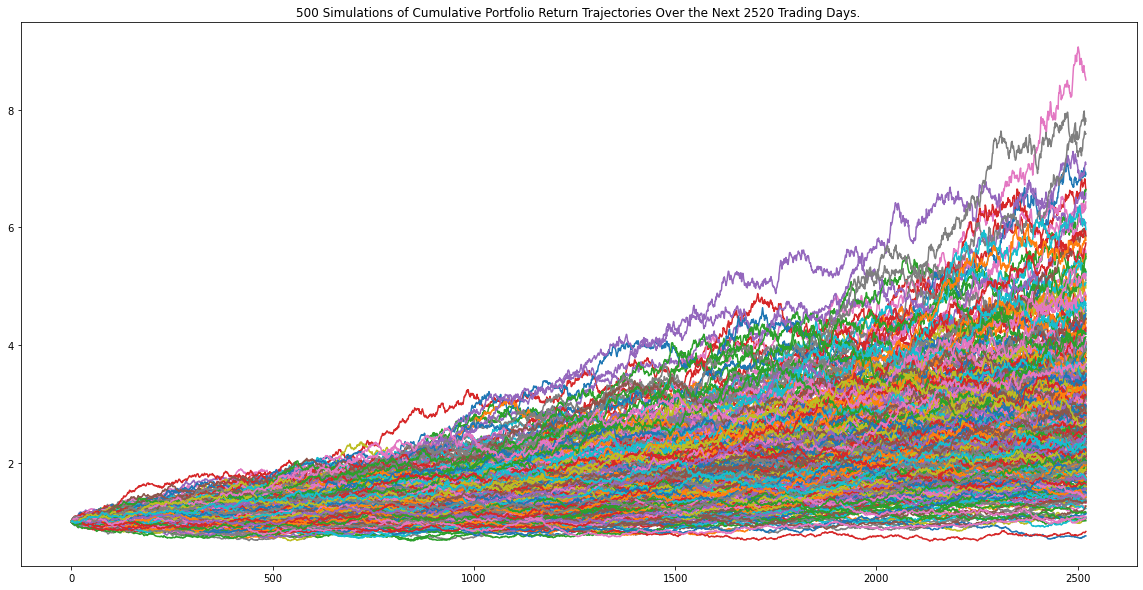

In [34]:
# Plot simulation outcomes
mcs_10a_cum_plot = mcs_10a_cum_returns.plot_simulation()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
mcs_10a_summary = mcs_10a_cum_returns.summarize_cumulative_return()

# Print summary statistics
print(mcs_10a_summary)

count           500.000000
mean              2.768546
std               1.163711
min               0.753659
25%               1.968300
50%               2.537135
75%               3.326666
max               8.503474
95% CI Lower      1.186600
95% CI Upper      5.852961
Name: 2520, dtype: float64


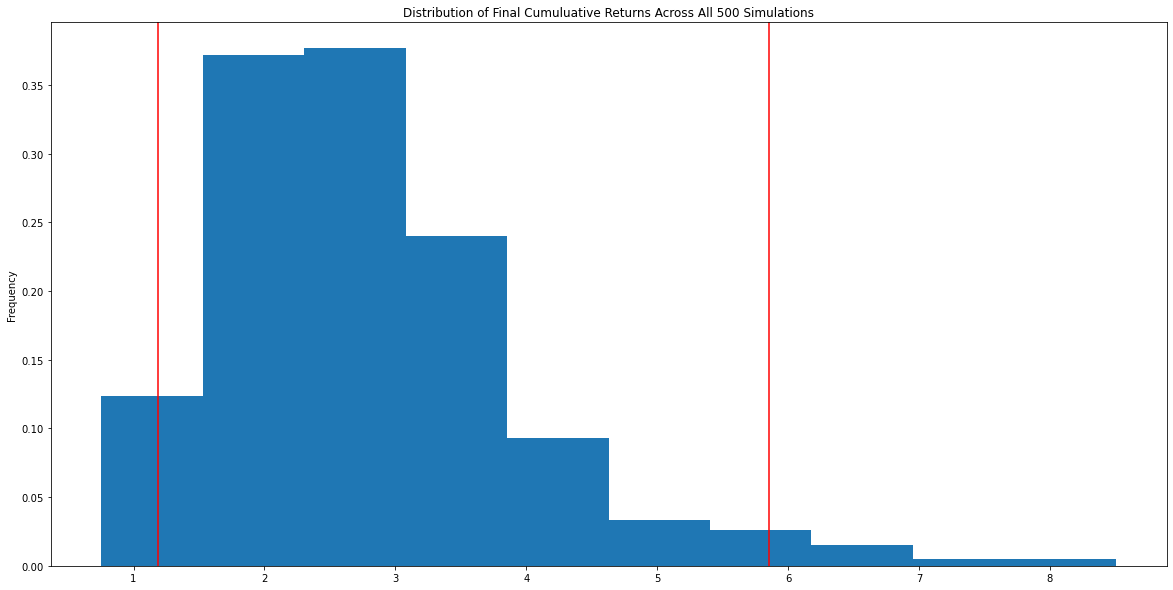

In [36]:
# Plot probability distribution and confidence intervals
mcs_10a_cum_plot = mcs_10a_cum_returns.plot_distribution()

In [37]:
# Set initial investment
initial_investment_10a = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(mcs_10a_summary[8]*initial_investment_10a,2)
ci_upper_ten = round(mcs_10a_summary[9]*initial_investment_10a,2)



# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10a} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $23732.0 and $117059.23
